In [1]:
import os
#import shutil
import re
import random
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import plot_model
import kerastuner as kt
import IPython
import PIL
from PIL import Image
import shap

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passi

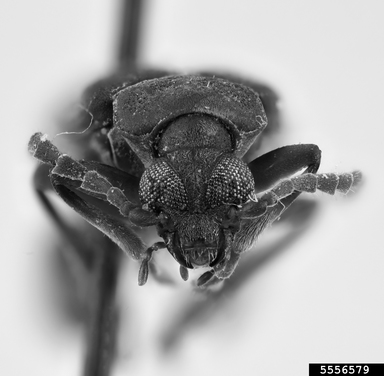

In [2]:
img = Image.open("insects/train/beetles/5556579.jpg").convert('L')
img

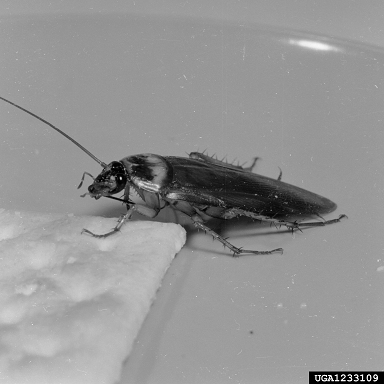

In [3]:
img1 = Image.open("insects/train/cockroach/1233109.jpg").convert('L')
img1

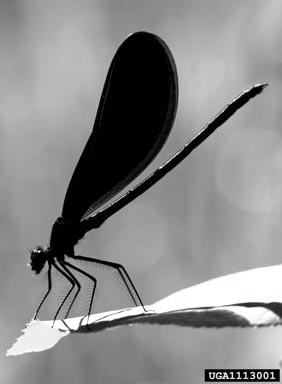

In [4]:
img2 = Image.open("insects/train/dragonflies/1113001.jpg").convert('L')
img2

In [5]:
def getpath(train=True):
    if train:
        path_ins = {"beetles" : "insects/train/beetles","cockroach" : "insects/train/cockroach","dragonflies" : "insects/train/dragonflies"}
    else:
        path_ins = {"beetles" : "insects/test/beetles","cockroach" : "insects/test/cockroach","dragonflies" : "insects/test/dragonflies"}
    path_ = []
    for insect, path in path_ins.items():
        path_dir = path +'/'
        images = sum([file for root,dirc,file in os.walk(path)],[])
        path_.append([path_dir + img for img in images])
    path_ = sum(path_,[])
    return path_

In [6]:
path_train=getpath(train=True)
path_test=getpath(train=False)

In [7]:
def getinput(path_):
    images=[]
    labels=[]
    for path in path_:
        image = Image.open(path).convert('L')
        sqr_l = min(image.size)
        image = image.crop((0, 0, sqr_l, sqr_l))
        image.thumbnail((100,100), PIL.Image.ANTIALIAS)
        random.seed(1)
        random.shuffle(path_)
        images.append(np.asarray(image))
        if re.match(r'.*beetles.*', path):
            labels.append(0)
        elif re.match(r'.*cockroach.*', path):
            labels.append(1)
        elif re.match(r'.*dragonflies.*', path):
            labels.append(2)
    X=np.asarray(images)
    y=np.asarray(labels)
    return X, y

In [8]:
X_train, y_train = getinput(path_train)
X_test, y_test = getinput(path_test)
if X_train.max() > 1:
    X_train = X_train / 255.0
if X_test.max() > 1:
    X_test = X_test / 255.0

In [11]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(100, 100), name="Flatten_input"),
                          keras.layers.Dense(128, activation=tf.nn.sigmoid, name="Hidden_layer_1"),
                          keras.layers.Dense(16, activation=tf.nn.sigmoid, name="Hidden_layer_2"),
                          keras.layers.Dense(3, activation=tf.nn.softmax, name="Output")])
model.compile(optimizer="SGD",loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn = model.fit(X_train, y_train,epochs=200, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test)
test_acc

180/180 [==============================] - ETA: 0s - loss: 0.5553 - acc: 0.812 - 0s 417us/sample - loss: 0.5385 - acc: 0.8056


0.8055556